<a href="https://colab.research.google.com/github/famithasidhique/Assignments/blob/main/CarPrice_CodeAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Loading and Preprocessing

In [36]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.shape

(205, 26)

In [37]:
# displaying first 1 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
#Details of dataset loaded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [39]:
#statistical data about numerical columns in dataset
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [40]:
#Checking null values
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [41]:
# Checking Duplicate values
df.duplicated().sum()

np.int64(0)

In [49]:

# selecting numerical columns and categorical columns
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns
print("Numerical columns are: ",num_cols)
print("Categorical columns are: ",cat_cols)
print(num_cols.shape)
print(cat_cols.shape)


Numerical columns are:  Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')
Categorical columns are:  Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')
(17,)
(8,)


In [43]:
# Removing Feature car_ID as it is not affecting the price
df.drop('car_ID', axis=1, inplace=True)
df.shape

(205, 25)

In [44]:
# converting categorical columns to numerical
#1.doornumber
mapping = {'two': 2, 'four': 4}
df['doornumber'] = df['doornumber'].map(mapping)
df['doornumber']

,doornumber
0,2
1,2
2,2
3,4
4,4
...,...
200,4
201,4
202,4
203,4


In [47]:
#2.cylindernumber
df['cylindernumber'].unique()


array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [48]:
mapp = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
df['cylindernumber'] = df['cylindernumber'].map(mapp)
df['cylindernumber']

,cylindernumber
0,4
1,4
2,6
3,4
4,5
...,...
200,4
201,4
202,6
203,6


In [53]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


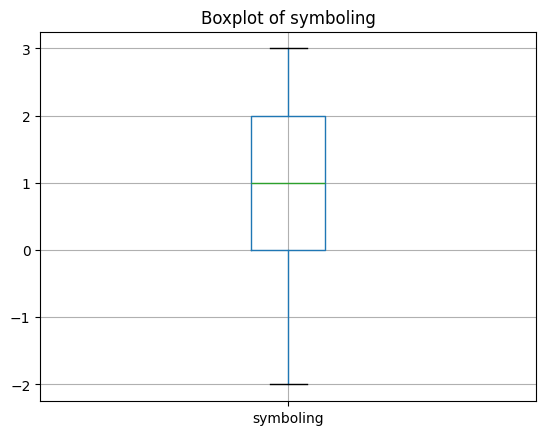

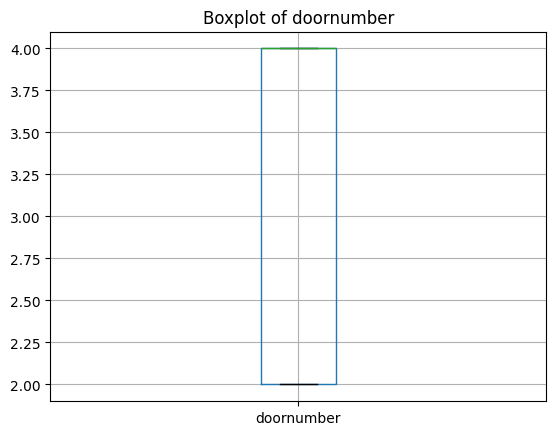

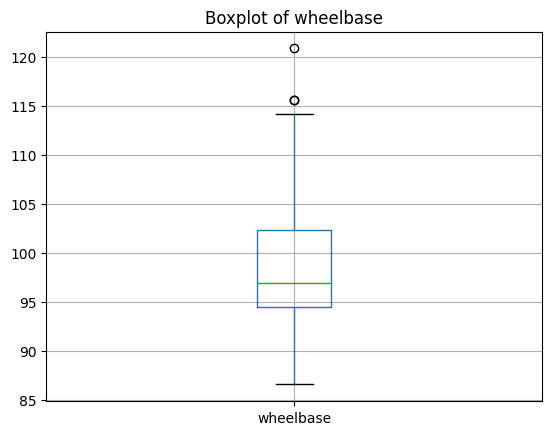

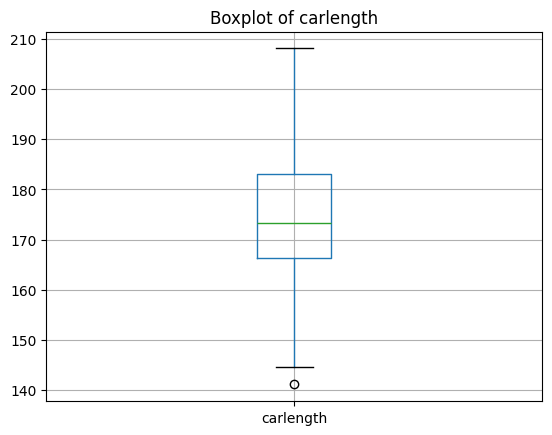

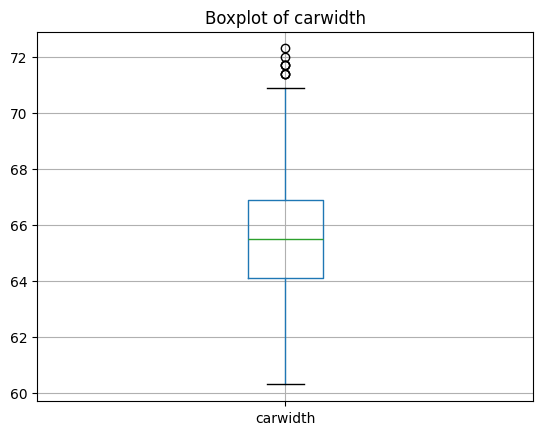

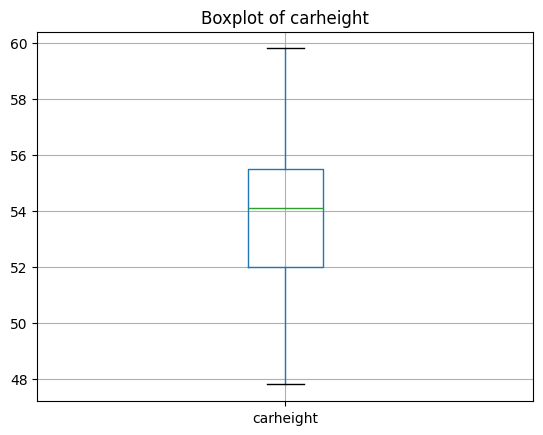

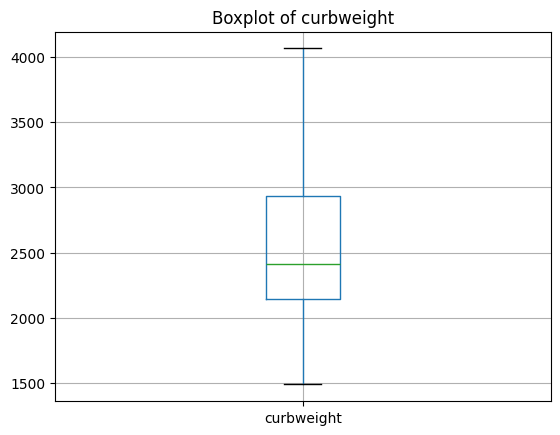

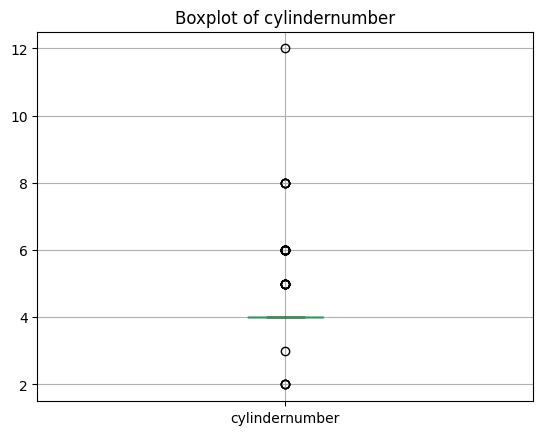

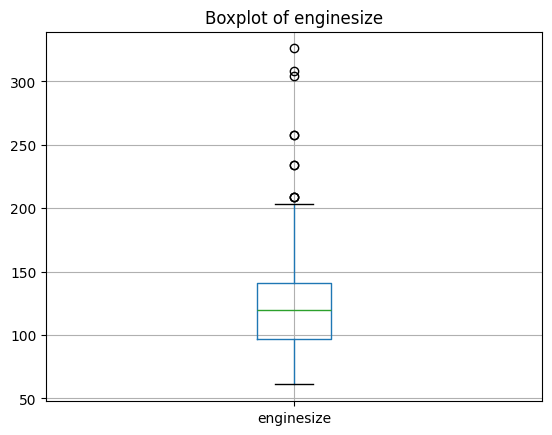

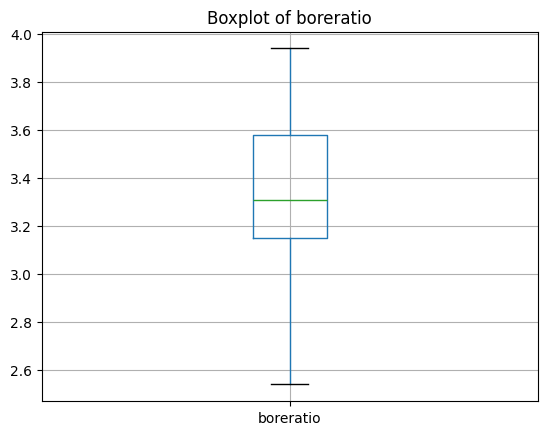

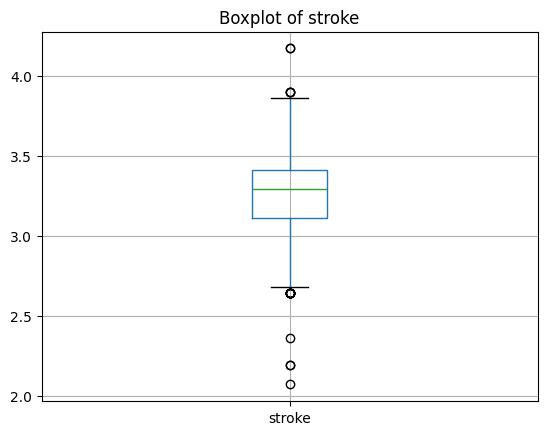

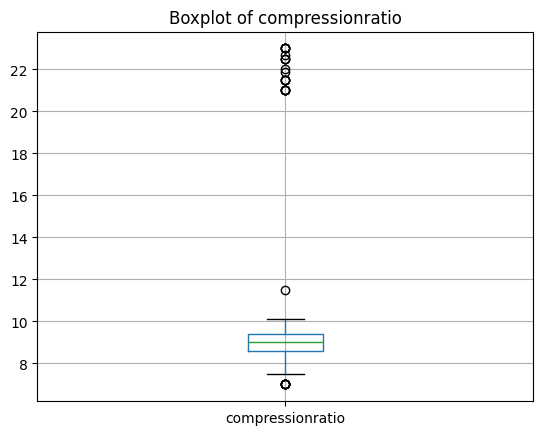

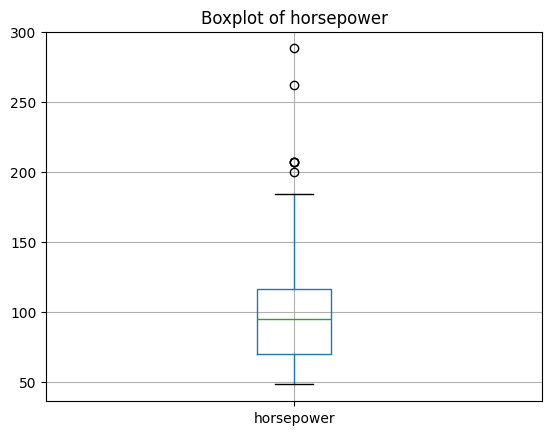

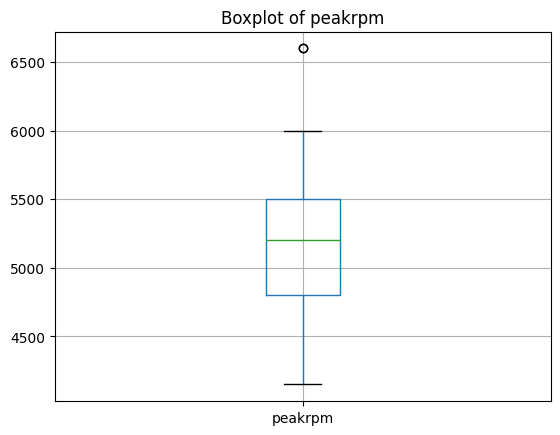

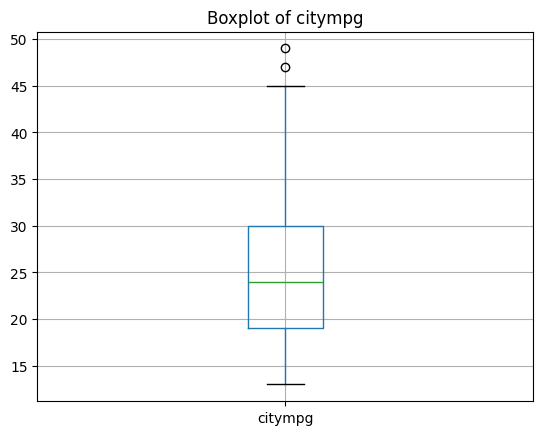

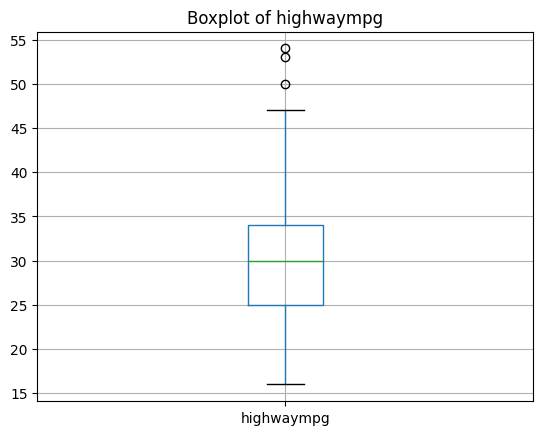

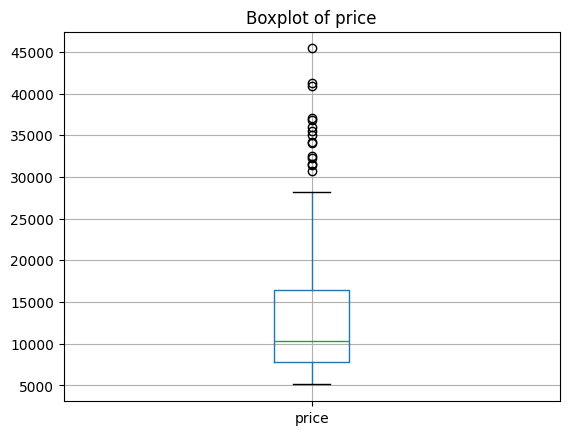

In [54]:
#Outliers checking
#box plot before removing outliers
for col in num_cols:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [55]:
# Checking outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1 = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed successfully!")
df1.shape

Outliers removed successfully!


(190, 25)

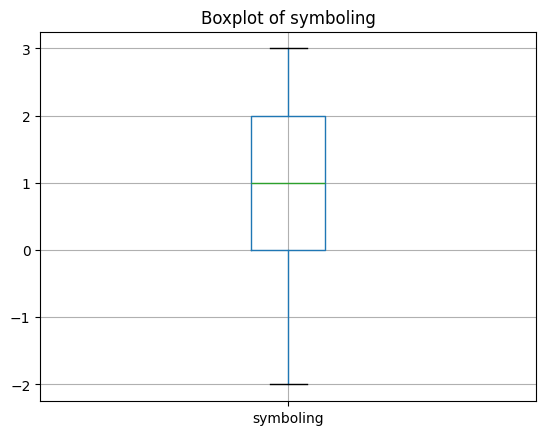

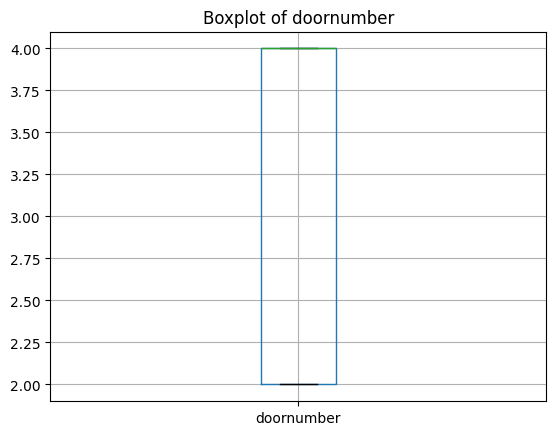

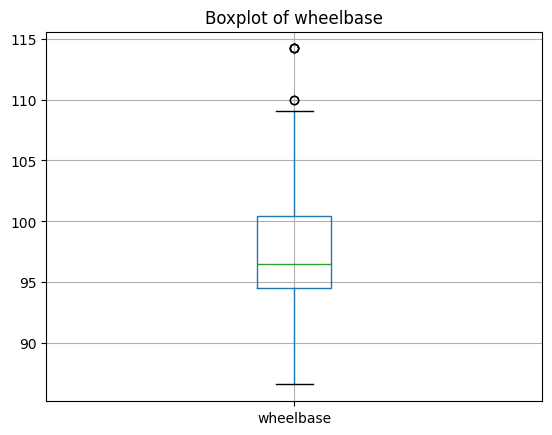

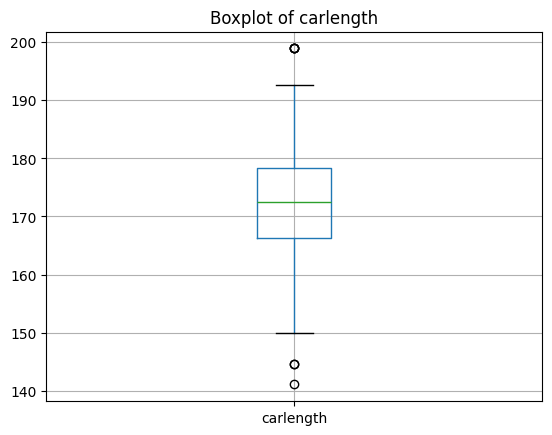

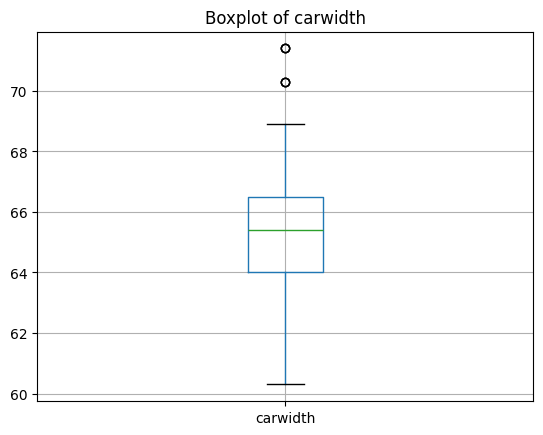

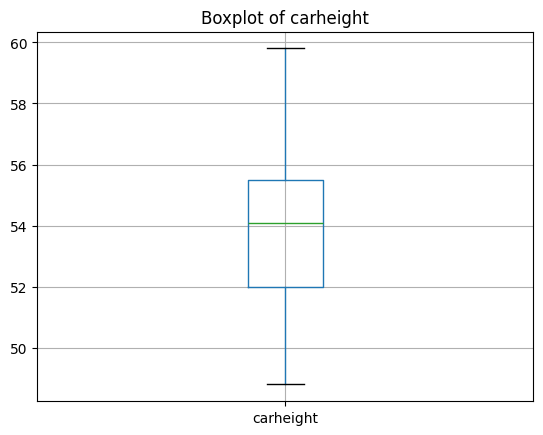

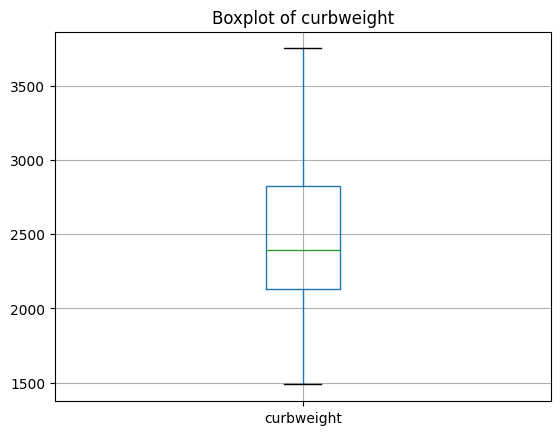

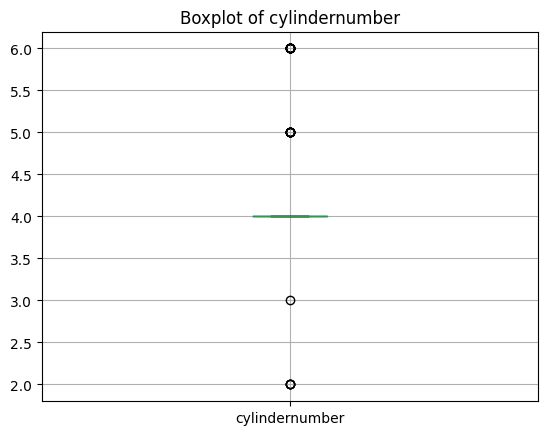

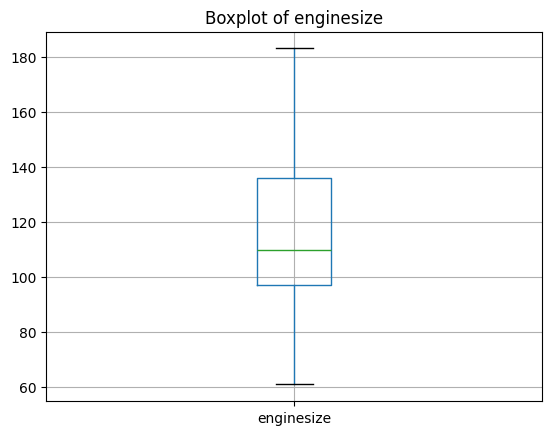

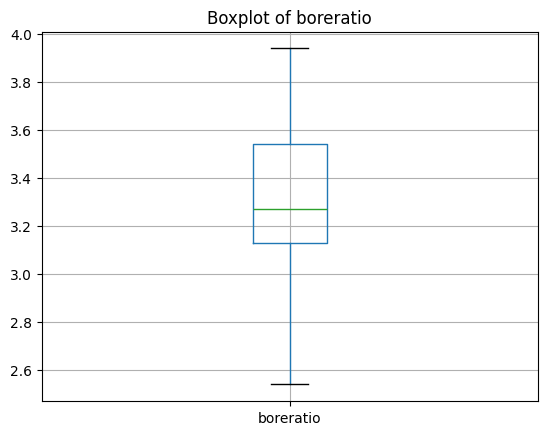

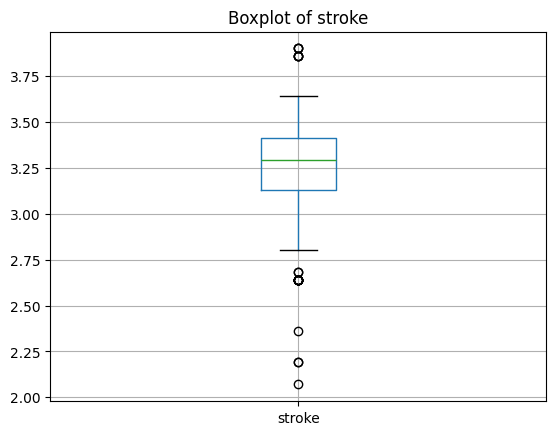

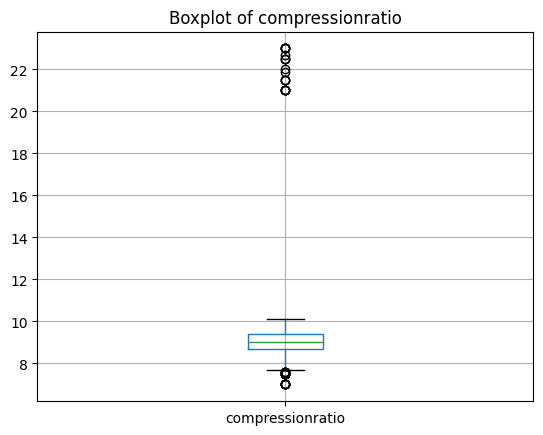

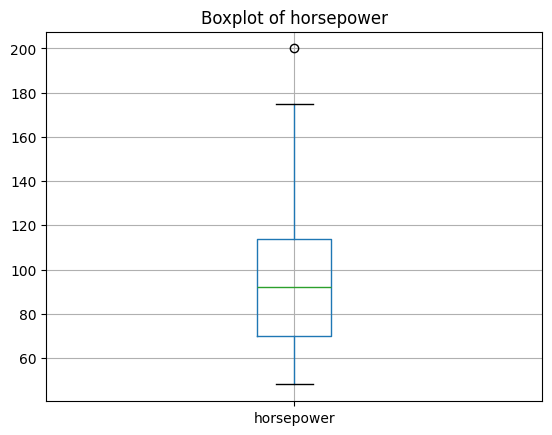

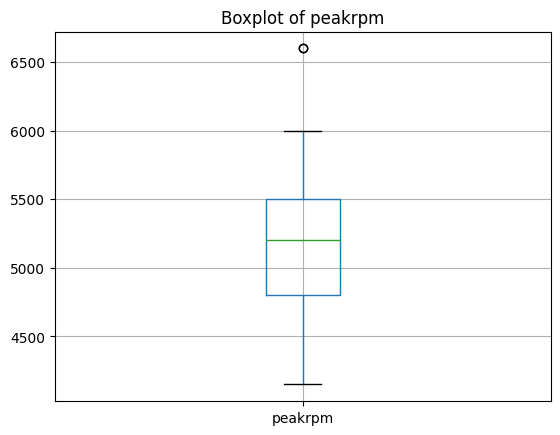

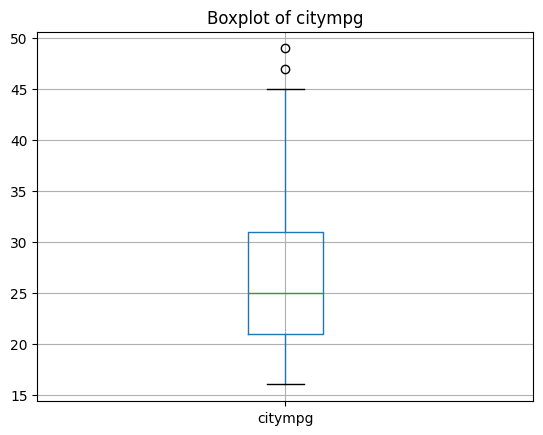

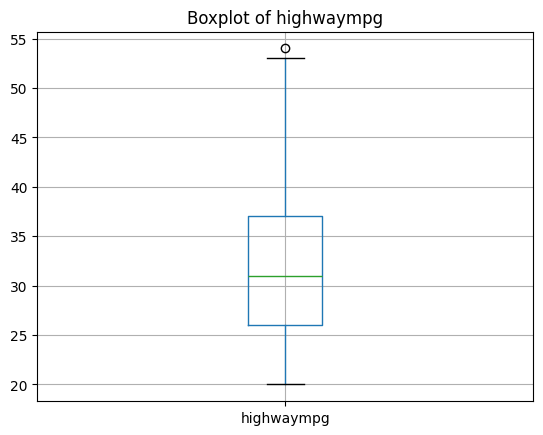

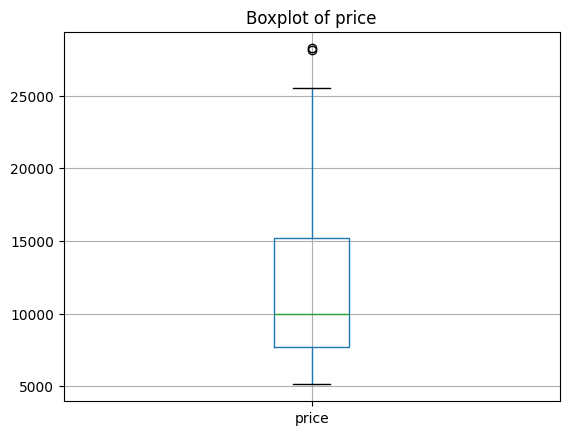

In [65]:
# Boxplot After removing outliers
for col in num_cols:
    df1.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [59]:
cor=df1.corr()
cor

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.170280,0.184481,-0.045174,-0.661596,-0.565359,-0.043679,NaN,-0.510587,-0.327519,...,-0.125601,0.092932,-0.157305,0.055306,-0.175222,0.076022,0.239516,-0.046133,0.018035,-0.128941
CarName,-0.170280,1.000000,-0.078074,0.009281,0.210188,0.121235,0.066368,NaN,0.187326,0.217801,...,0.046852,0.185215,0.282829,-0.159998,0.100276,0.011946,-0.204081,0.002703,-0.007476,-0.081616
fueltype,0.184481,-0.078074,1.000000,-0.376051,-0.184189,-0.141585,-0.155435,NaN,-0.349575,-0.238406,...,-0.184127,0.020768,-0.076768,-0.248541,-0.986015,0.163763,0.485453,-0.257642,-0.193110,-0.235380
aspiration,-0.045174,0.009281,-0.376051,1.000000,0.014557,0.041143,0.102812,NaN,0.312240,0.288336,...,0.302886,0.334220,0.268686,0.233161,0.266522,0.436892,-0.173638,-0.275488,-0.332171,0.425768
doornumber,-0.661596,0.210188,-0.184189,0.014557,1.000000,0.682370,-0.089398,NaN,0.453853,0.423849,...,0.092876,0.001876,0.165858,-0.081523,0.181074,-0.075789,-0.224638,-0.039984,-0.053093,0.144604
carbody,-0.565359,0.121235,-0.141585,0.041143,0.682370,1.000000,-0.118039,NaN,0.423670,0.383484,...,0.030142,-0.027500,0.088434,-0.085457,0.133542,-0.065051,-0.075730,-0.032688,-0.068359,0.084097
drivewheel,-0.043679,0.066368,-0.155435,0.102812,-0.089398,-0.118039,1.000000,NaN,0.457107,0.435822,...,0.473475,0.380612,0.416678,0.063249,0.153152,0.443727,-0.045907,-0.365700,-0.371624,0.548936
enginelocation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,-0.510587,0.187326,-0.349575,0.312240,0.453853,0.423670,0.457107,NaN,1.000000,0.859280,...,0.570260,0.401138,0.512363,0.055781,0.302991,0.377546,-0.304770,-0.455649,-0.511091,0.667712
carlength,-0.327519,0.217801,-0.238406,0.288336,0.423849,0.383484,0.435822,NaN,0.859280,1.000000,...,0.686552,0.558936,0.599479,0.059792,0.191597,0.564379,-0.252795,-0.645277,-0.663684,0.729734


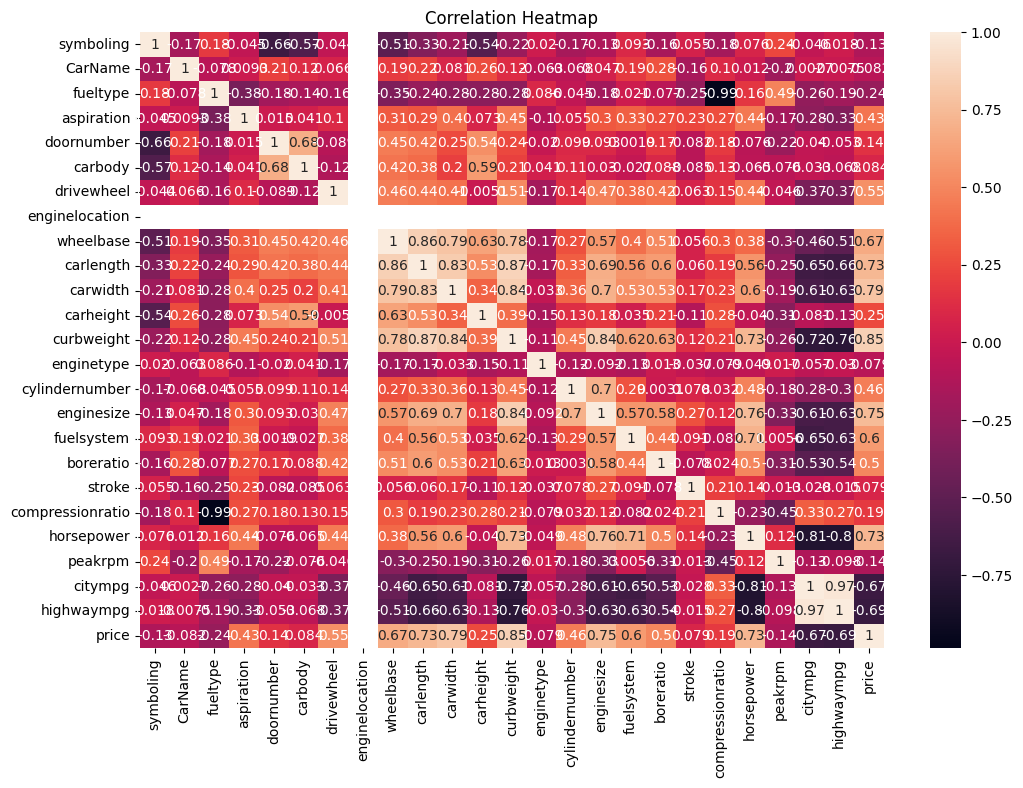

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True)
plt.title("Correlation Heatmap")
plt.show()

##Model Implementation

In [80]:
#Train–Test Split
from sklearn.model_selection import train_test_split
X = df1.drop('price', axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((152, 24), (38, 24), (152,), (38,))

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel='rbf')
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, "trained successfully.")


Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
SVR trained successfully.


In [82]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score           MSE          MAE
0  Linear Regression  0.802100  3.326602e+06  1459.839774
1      Decision Tree  0.795010  3.445795e+06  1186.649132
2      Random Forest  0.904403  1.606936e+06   902.238763
3  Gradient Boosting  0.885161  1.930398e+06   980.303522
4                SVR -0.024244  1.721706e+07  3666.905775


## Based on the R2 values Best model is Random Forest Model


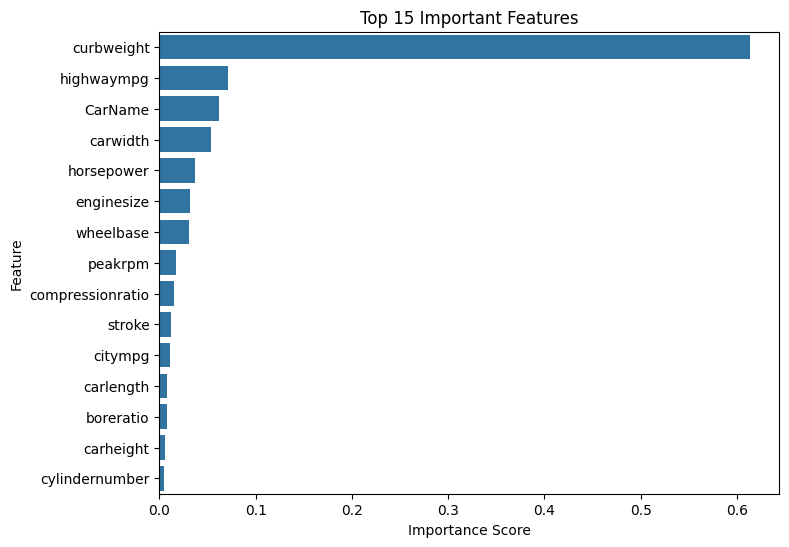

In [83]:
#Feature Importance (Random Forest)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


##Hyperparameter Tuning (Random Forest)

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),param_grid,scoring='r2',cv=3)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.7762319687299225
